### Example1
Solve the equations 
$$ \begin{bmatrix}
4 & -1 & 1 \\
-1 & 4 & -2 \\
1 & -2 & 4
\end{bmatrix}  \begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\end{bmatrix} = 
\begin{bmatrix}
12 \\
-1 \\
5 \\
\end{bmatrix}$$
by the Conjugate gradient.($x_0 = [0,0,0]$)

In [3]:
from numpy import ndarray
def conju_grad(A : ndarray, B : ndarray, X_init=None, tol=1.0e-9, iter=10) : 
    import numpy as np

    if X_init is None : 
        X_init = np.zeros(B.shape)
    
    r = B - A @ X_init
    s = r.copy()

    sol_iter = 0
    while sol_iter <= iter : 
        
        alpha = (r.T @ s) / (s.T @ A @ s)
        X_init = X_init + alpha * s
        r = B - A @ X_init

        if np.sqrt(r.T @ r) <= tol : 
            break
        
        else : 
            beta = -1 * (r.T @ A @ s) / (s.T @ A @ s)
            s = r + beta * s
            sol_iter += 1
    
    return X_init, sol_iter

In [5]:
import numpy as np

A = np.array([
    [4, -1, 1],
    [-1, 4, -2],
    [1, -2, 4]
], dtype=float)

B = np.array([
    [12, -1, 5]
], dtype=float).T

solution, num_iter = conju_grad(A, B)
print(solution, num_iter, sep="\n")

[[3.]
 [1.]
 [1.]]
2


In [6]:
A = np.array([
    [4, -1, 1],
    [-1, 4, -2],
    [1, -2, 4]
], dtype=float)

B = np.array([
    [12, -1, 5]
], dtype=float).T

np.linalg.solve(A, B)

array([[3.],
       [1.],
       [1.]])

### Example2

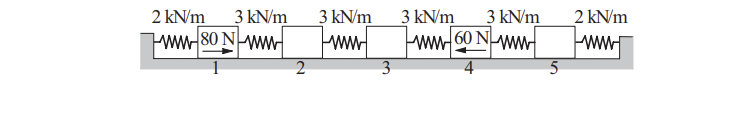

The equilibrium equations of the blocks in the spring-block system are

$$3(x_2 - x_1) - 2x_1 = -80$$

$$3(x_3 - x_2) - 3(x_2-x_1) = 0$$

$$3(x_4 - x_3) - 3(x_3-x_2) = 0$$

$$3(x_5- x_4) - 3(x_4-x_3) = 60$$

$$-2x_5 - 3(x_5-x_4) = 0$$

Solve the equaion with the conjugate gradient method. Start with x=0.

$$
-5x_{1} + 3x_{2} = -80\\
3x_{1} - 6x_{2} + 3x_{3} = 0\\
3x_{2} - 6x_{3} + 3x_{4} = 0\\
3x_{3} - 6x_{4} + 3x_{5} = 60\\
3x_{4} - 5x_{5} = 0\\
$$

$$A =
\begin{pmatrix}
-5 & 3 & 0 & 0 & 0 \\
3 & -6 & 3 & 0 & 0 \\
0 & 3 & -6 & 3 & 0 \\
0 & 0 & 3 & -6 & 3 \\
0 & 0 & 0 & 3 & -5 \\
\end{pmatrix},

B = 
\begin{pmatrix}
-80\\
0\\
0\\
60\\
0
\end{pmatrix}
$$

In [9]:
import numpy as np

def create_matrix() : 
    import numpy as np
    
    temp_1 = np.eye(5, dtype=float) * -6
    temp_1[0,0] = -5
    temp_1[4,4] = -5

    temp_1 = temp_1 + np.eye(5, k=1, dtype=float) * 3 + np.eye(5, k=-1, dtype=float) * 3
    return temp_1

In [11]:
A = create_matrix()
B = np.array([
    [-80, 0, 0, 60, 0]
], dtype=float).T

In [12]:
x_sol, num_iter = conju_grad(A, B)
print(num_iter)
print(x_sol)

4
[[ 20.71428571]
 [  7.85714286]
 [ -5.        ]
 [-17.85714286]
 [-10.71428571]]


In [14]:
print(np.round(A @ x_sol, 2))

[[-80.]
 [  0.]
 [ -0.]
 [ 60.]
 [ -0.]]
